In [1]:
import pandas as pd
data = pd.read_excel('/Users/admin/Desktop/Football_db/APL_last_data.xlsx', sheetname = 'out_all_APL')

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd

In [2]:
data_1 = pd.read_excel('/Users/admin/Desktop/Football_db/APL_last_data2.xlsx', sheetname = 'out_all_APL')

In [4]:
data_1.head()

,id,season,stage,home_team_goal,away_team_goal,Goal_diff,Home_team_points,Away_team_points,Total_H_points,Total_A_points,...,Defense_a,Mid_a,Attack_a,B365H,B365D,B365A,BWH,BWD,BWA,Class
0,1730,2008/2009,1,1,0,1,3,0,3,0,...,69.75,70.00,68.0,1.20,6.5,15.00,1.22,5.5,10,1
1,1731,2008/2009,1,0,1,-1,0,3,0,3,...,79.25,79.00,85.5,5.50,3.6,1.67,5,3.35,1.67,-1
2,1732,2008/2009,1,2,1,1,3,0,3,0,...,71.25,71.50,74.0,1.91,3.4,4.20,1.9,3.2,3.8,1
3,1734,2008/2009,1,2,3,-1,0,3,0,3,...,76.25,75.75,78.5,2.00,3.3,4.00,1.85,3.25,4,-1
4,1735,2008/2009,1,2,1,1,3,0,3,0,...,76.25,80.75,78.5,3.20,3.4,2.25,2.8,3.2,2.3,1


In [189]:
from sklearn import preprocessing
features = data_1[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
       'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
target = data_1[['Class']].values
features = preprocessing.scale(features)
c, r = target.shape
target = target.reshape(c,)

Функция для Confusion_matrix

In [27]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# SVM analysis

Подбор параметров для Accuracy

Scaled: Last 5 games, all odds

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
import numpy as np
features = preprocessing.scale(features)
kernels = ['rbf', 'linear']
def best_params_SVM(C):
    best_acc = 0
    best_C = 0
    best_kernel = 0
    for i in kernels:
        for j in C:
            clf = SVC(C = j, kernel = i, random_state = 6632)
            scores = cross_val_score(clf, features, target, cv=5)
            if np.mean(scores) > best_acc:
                best_acc = np.mean(scores)
                best_C = j
                best_kernel = i
            print(i, 'for C = ', j, 'accuracy = ', np.mean(scores))
    print('BEST RESULT', best_kernel, 'for C = ', best_C, 'accuracy = ', best_acc)
best_params_SVM(np.arange(1, 5, 1))

rbf for C =  1 accuracy =  0.523794020741
rbf for C =  2 accuracy =  0.52076259945
rbf for C =  3 accuracy =  0.517386482598
rbf for C =  4 accuracy =  0.509277204262
linear for C =  1 accuracy =  0.51704920484
linear for C =  2 accuracy =  0.51704920484
linear for C =  3 accuracy =  0.517387614315
linear for C =  4 accuracy =  0.517387614315
BEST RESULT rbf for C =  1 accuracy =  0.523794020741


Построим confusion_matrix:

Accuracy for test sample: 0.546374367622
Confusion matrix, without normalization
[[ 77   2 102]
 [ 24   5 112]
 [ 29   0 242]]


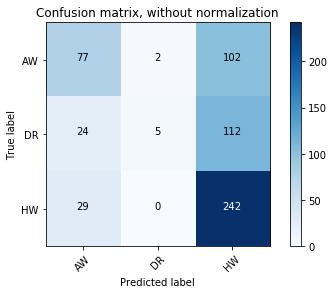

In [190]:
from sklearn.cross_validation import train_test_split
features = preprocessing.scale(features)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=6632)
clf = SVC(C = 1, kernel = 'rbf', random_state = 6632) #put optimal params from last code
clf.fit(X_train, y_train)
print('Accuracy for test sample:', accuracy_score(y_test, clf.predict(X_test)))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['AW', 'DR', 'HW'], title='Confusion matrix, without normalization')
plt.savefig('foo.png')

In [206]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = SVC(C = 1, kernel = 'rbf', random_state = 6632)
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_train = preprocessing.scale(features_train)
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_test = preprocessing.scale(features_test)
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [500]
        draw_odd = [500]
        lose_odd = [500]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    invest = []
                    for i in range(len(data_test)):
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                                invest.append(win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                                invest.append(draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                                invest.append(lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                                invest.append(win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                                invest.append(draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
                                invest.append(lose)
        all_res.append(sum(result))
        invested.append(sum(invest))
        ROI.append(sum(result)/sum(invest))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()    

For season 2008/2009 Invested: 174000 Profit 1500.0 ROI 0.00862068965517
For season 2009/2010 Invested: 186500 Profit -11840.0 ROI -0.0634852546917
For season 2010/2011 Invested: 183500 Profit -22355.0 ROI -0.121825613079
For season 2011/2012 Invested: 183500 Profit -22970.0 ROI -0.125177111717
For season 2012/2013 Invested: 190000 Profit -14555.0 ROI -0.0766052631579
For season 2013/2014 Invested: 189000 Profit 9800.0 ROI 0.0518518518519
For season 2014/2015 Invested: 185500 Profit -8860.0 ROI -0.0477628032345
For season 2015/2016 Invested: 188500 Profit -27060.0 ROI -0.143554376658
SUMMARY Invested: 1480500 Profit: -96340.0 ROI: -0.0650726106045


In [201]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']

def best_income_fun(C):
    C_best = 0
    win_odd = [0, 500]
    draw_odd = [0, 500]
    lose_odd = [0, 500]
    best_odd = []
    Total_invested = 0
    Total_profit = 0
    last_best = -20
    for win in win_odd:
        for lose in lose_odd:
            for draw in draw_odd:
                for j in C:
                    clf = SVC(C = j, kernel = 'rbf', random_state = 6632)
                    all_res = []
                    all_invest = []
                    total = 0
                    profit = 0
                    invested = 0
                    ROI = 0 
                    for s in seasons:
                        data_train = data_1[data_1['season'] != s]
                        features_train = data_train[['Last_3_games_at_home',
                       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                        features_train = preprocessing.scale(features_train)
                        target_train = data_train[['Class']].values
                        data_test = data_1[data_1['season'] == s]
                        features_test = data_test[['Last_3_games_at_home',
                        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                        features_test = preprocessing.scale(features_test)
                        target_test = data_test[['Class']].values
                        c, r = target_train.shape
                        target_train = target_train.reshape(c,)
                        c, r = target_test.shape
                        target_test = target_test.reshape(c,)
                        clf.fit(features_train, target_train)
                        Class = data_test['Class'].values
                        Book_H = data_test['B365H'].values
                        Book_D = data_test['B365D'].values
                        Book_A = data_test['B365A'].values
                        pred = clf.predict(features_test)
                        best_res = -10000
                        result = []
                        invest = []
                        for i in range(len(data_test)):
                            if Class[i] == pred[i]:
                                if Class[i] == 1:
                                    result.append((Book_H[i] - 1) * win)
                                    invest.append(win)
                                if Class[i] == 0:
                                    result.append((Book_D[i] - 1) * draw)
                                    invest.append(draw)
                                if Class[i] == -1:
                                    result.append((Book_A[i] - 1) * lose)
                                    invest.append(lose)
                            else:
                                if pred[i] == 1:
                                    result.append((-1) * win)
                                    invest.append(win)
                                if pred[i] == 0:
                                    result.append((-1) * draw)
                                    invest.append(draw)
                                if pred[i] == -1:
                                    result.append((-1) * lose)
                                    invest.append(lose)
                        all_res.append(sum(result))
                        all_invest.append(sum(invest))
                    profit = np.sum(all_res)
                    invested = np.sum(all_invest)
                    ROI = profit/invested
                    if ROI > last_best:
                        last_best = ROI
                        C_best = j 
                        Total_invested = invested
                        Total_profit = profit
                        best_odd = [win, draw, lose]
    print('C_best:', C_best, 'Profit', Total_profit,'Invested:', Total_invested,'odds_vestor', best_odd, 'ROI', last_best)
best_income_fun(np.arange(1, 15, 1))    

C_best: 8 Profit -4635.0 Invested: 121000 odds_vestor [0, 500, 0] ROI -0.038305785124


In [208]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = SVC(C = 8, kernel = 'rbf', random_state = 6632)
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_train = preprocessing.scale(features_train)
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_test = preprocessing.scale(features_test)
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [0]
        draw_odd = [500]
        lose_odd = [0]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    invest = []
                    for i in range(len(data_test)):
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                                invest.append(win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                                invest.append(draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                                invest.append(lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                                invest.append(win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                                invest.append(draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
                                invest.append(lose)
        all_res.append(sum(result))
        invested.append(sum(invest))
        ROI.append(sum(result)/sum(invest))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()  

For season 2008/2009 Invested: 15000 Profit 1425.0 ROI 0.095
For season 2009/2010 Invested: 15500 Profit -3700.0 ROI -0.238709677419
For season 2010/2011 Invested: 15000 Profit -50.0 ROI -0.00333333333333
For season 2011/2012 Invested: 19000 Profit -2300.0 ROI -0.121052631579
For season 2012/2013 Invested: 11000 Profit 1150.0 ROI 0.104545454545
For season 2013/2014 Invested: 16500 Profit -5335.0 ROI -0.323333333333
For season 2014/2015 Invested: 9000 Profit 1250.0 ROI 0.138888888889
For season 2015/2016 Invested: 20000 Profit 2925.0 ROI 0.14625
SUMMARY Invested: 121000 Profit: -4635.0 ROI: -0.038305785124


# RandomForest

Подбор параметров для Accuracy

In [46]:
from sklearn.ensemble import RandomForestClassifier
max_features = ["auto", "sqrt", "log2"]
def best_params_Rf(min_samples_leaf):
    best_acc = 0
    best_max_features = 0
    best_min_sample_leaf = 0
    for i in max_features:
        for j in min_samples_leaf:
            clf = RandomForestClassifier(min_samples_leaf = j, max_features = i, n_estimators = 50, random_state = 6632) 
            scores = cross_val_score(clf, features, target, cv=5)
            if np.mean(scores) > best_acc:
                best_acc = np.mean(scores)
                best_max_features = i
                best_min_samples_leaf = j
    print('BEST RESULT', i, 'for min_leaf = ', best_min_samples_leaf , 'accuracy = ', best_acc)
best_params_Rf(np.arange(80, 80, 1))

BEST RESULT log2 for min_leaf =  80 accuracy =  0.532251951846 8


In [179]:
from sklearn.ensemble import RandomForestClassifier
max_features = ["auto", "log2"]
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=6632)
def best_params_Rf(min_samples_leaf, n_est):
    best_acc = 0
    best_max_features = 0
    best_min_sample_leaf = 0
    best_est = 0
    for i in max_features:
        for j in min_samples_leaf:
            for k in n_est:
                clf = RandomForestClassifier(min_samples_leaf = j, max_features = i, n_estimators = k, random_state = 6632) 
                clf.fit(X_train, y_train)
                scores = accuracy_score(y_test, clf.predict(X_test))
                if np.mean(scores) > best_acc:
                    best_acc = np.mean(scores)
                    best_max_features = i
                    best_min_samples_leaf = j
                    best_est = k 
    print('BEST RESULT', i, 'for min_leaf = ', best_min_samples_leaf , 'accuracy = ', best_acc, 'n_est: ', best_est)
best_params_Rf(np.arange(2, 82, 1), np.arange(2, 60, 2))

BEST RESULT log2 for min_leaf =  58 accuracy =  0.576728499157 n_est:  6


Построим Confusion_matrix:

0.559865092749
Confusion matrix, without normalization
[[ 87   2  92]
 [ 26   8 107]
 [ 32   2 237]]


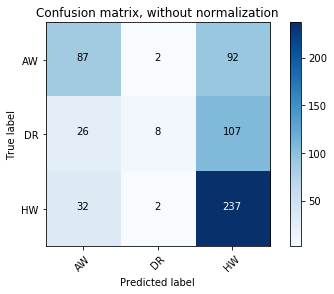

In [188]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=6632)
clf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 80, max_features = 'log2', n_estimators = 50, random_state = 6632) #put optimal params from last code
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['AW', 'DR', 'HW'], title='Confusion matrix, without normalization')

In [195]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 80, max_features = 'log2', n_estimators = 50, random_state = 6632) #put optimal params from last code
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_train = preprocessing.scale(features_train)
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_test = preprocessing.scale(features_test)
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [500]
        draw_odd = [500]
        lose_odd = [500]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    for i in range(len(data_test)):
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
        all_res.append(sum(result))
        invested.append(500*len(result))
        ROI.append(sum(result)/(500*len(result)))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()  

For season 2008/2009 Invested: 174000 Profit -7035.0 ROI -0.0404310344828
For season 2009/2010 Invested: 186500 Profit -7825.0 ROI -0.0419571045576
For season 2010/2011 Invested: 183500 Profit -12650.0 ROI -0.0689373297003
For season 2011/2012 Invested: 183500 Profit -17625.0 ROI -0.0960490463215
For season 2012/2013 Invested: 190000 Profit -9280.0 ROI -0.0488421052632
For season 2013/2014 Invested: 189000 Profit 18490.0 ROI 0.0978306878307
For season 2014/2015 Invested: 185500 Profit -4485.0 ROI -0.0241778975741
For season 2015/2016 Invested: 188500 Profit -32125.0 ROI -0.170424403183
SUMMARY Invested: 1480500 Profit: -72535.0 ROI: -0.0489935832489


In [202]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']

def best_income_fun(min_leaf, n_est):
    min_leaf_best = 0
    n_est_best = 0
    win_odd = [0, 500]
    draw_odd = [0, 500]
    lose_odd = [0, 500]
    best_odd = []
    Total_invested = 0
    Total_profit = 0
    last_best = -20
    for win in win_odd:
        for lose in lose_odd:
            for draw in draw_odd:
                for j in min_leaf:
                    for x in n_est:
                        clf = RandomForestClassifier(max_depth = 8, min_samples_leaf = j, max_features = 'log2', n_estimators = x, random_state = 6632)
                        all_res = []
                        all_invest = []
                        total = 0
                        profit = 0
                        invested = 0
                        ROI = 0 
                        for s in seasons:
                            data_train = data_1[data_1['season'] != s]
                            features_train = data_train[['Last_3_games_at_home',
                           'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            features_train = preprocessing.scale(features_train)
                            target_train = data_train[['Class']].values
                            data_test = data_1[data_1['season'] == s]
                            features_test = data_test[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            features_test = preprocessing.scale(features_test)
                            target_test = data_test[['Class']].values
                            c, r = target_train.shape
                            target_train = target_train.reshape(c,)
                            c, r = target_test.shape
                            target_test = target_test.reshape(c,)
                            clf.fit(features_train, target_train)
                            Class = data_test['Class'].values
                            Book_H = data_test['B365H'].values
                            Book_D = data_test['B365D'].values
                            Book_A = data_test['B365A'].values
                            pred = clf.predict(features_test)
                            best_res = -10000
                            result = []
                            invest = []
                            for i in range(len(data_test)):
                                if Class[i] == pred[i]:
                                    if Class[i] == 1:
                                        result.append((Book_H[i] - 1) * win)
                                        invest.append(win)
                                    if Class[i] == 0:
                                        result.append((Book_D[i] - 1) * draw)
                                        invest.append(draw)
                                    if Class[i] == -1:
                                        result.append((Book_A[i] - 1) * lose)
                                        invest.append(lose)
                                else:
                                    if pred[i] == 1:
                                        result.append((-1) * win)
                                        invest.append(win)
                                    if pred[i] == 0:
                                        result.append((-1) * draw)
                                        invest.append(draw)
                                    if pred[i] == -1:
                                        result.append((-1) * lose)
                                        invest.append(lose)
                            all_res.append(sum(result))
                            all_invest.append(sum(invest))
                        profit = np.sum(all_res)
                        invested = np.sum(all_invest)
                        ROI = profit/invested
                        if ROI > last_best:
                            last_best = ROI
                            min_leaf_best = j
                            n_est_best = x
                            Total_invested = invested
                            Total_profit = profit
                            best_odd = [win, draw, lose]
    print('min_leaf_best:', min_leaf_best, 'n_est_best:',  n_est_best,'Profit', Total_profit,'Invested:', Total_invested,'odds_vestor', best_odd, 'ROI', last_best)
best_income_fun(np.arange(10, 100, 5), np.arange(10, 100, 10))    

min_leaf_best: 95 n_est_best: 40 Profit 8525.0 Invested: 8000 odds_vestor [0, 500, 0] ROI 1.065625


In [207]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 95, max_features = 'log2', n_estimators = 40, random_state = 6632)
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_train = preprocessing.scale(features_train)
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_test = preprocessing.scale(features_test)
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [0]
        draw_odd = [500]
        lose_odd = [0]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    invest = []
                    for i in range(len(data_test)):
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                                invest.append(win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                                invest.append(draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                                invest.append(lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                                invest.append(win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                                invest.append(draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
                                invest.append(lose)
        all_res.append(sum(result))
        invested.append(sum(invest))
        ROI.append(sum(result)/sum(invest))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()  

For season 2008/2009 Invested: 2500 Profit 2550.0 ROI 1.02
For season 2009/2010 Invested: 1000 Profit 625.0 ROI 0.625
For season 2010/2011 Invested: 1500 Profit 1825.0 ROI 1.21666666667
For season 2011/2012 Invested: 1500 Profit 3400.0 ROI 2.26666666667
For season 2012/2013 Invested: 0 Profit 0.0 ROI nan
For season 2013/2014 Invested: 500 Profit 1125.0 ROI 2.25
For season 2014/2015 Invested: 0 Profit 0.0 ROI nan
For season 2015/2016 Invested: 1000 Profit -1000.0 ROI -1.0
SUMMARY Invested: 8000 Profit: 8525.0 ROI: 1.065625


In [213]:
def best_income_fun_with_prob(min_samples_leaf, draw_array):
    leaf_best = 0
    last_profit = 0
    last_invest = 0
    ROI = -20
    profit = 0
    invested = 0
    win_odd = [0, 500]
    draw_odd = [0, 500]
    lose_odd = [0, 500]
    odds_array = []
    win_odd_best = -1
    draw_odd_best = -1
    lose_odd_best = -1
    number_of_odds = 0
    last_best = -10000
    total = 0
    best_max_feat = -1
    best_thres = 0
    n = 0 
    for dr_pr in draw_array:
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:                       
                    for j in min_samples_leaf:
                        clf = RandomForestClassifier(max_features = 'log2', min_samples_leaf = j, n_estimators = 40, random_state = 6632)
                        all_res = []
                        all_invest = []
                        n = 0
                        for s in seasons:
                            data_train = data_1[data_1['season'] != s]
                            features_train = data_train[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            target_train = data_train[['Class']].values
                            data_test = data_1[data_1['season'] == s]
                            features_test = data_test[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            target_test = data_test[['Class']].values
                            c, r = target_train.shape
                            target_train = target_train.reshape(c,)
                            c, r = target_test.shape
                            target_test = target_test.reshape(c,)
                            clf.fit(features_train, target_train)
                            Class = data_test['Class'].values
                            Book_H = data_test['B365H'].values
                            Book_D = data_test['B365D'].values
                            Book_A = data_test['B365A'].values
                            pred = clf.predict(features_test)
                            probs = clf.predict_proba(features_test)
                            win_pr = probs[:, 2]
                            draw_pr = probs[:, 1]
                            lose_pr = probs[:, 0]
                            result = []
                            invest = []
                            for i in range(len(data_test)):
                                if draw_pr[i] > dr_pr or pred[i] == 0:
                                    pred[i] = 0
                                    n = n + 1
                                if Class[i] == pred[i]:
                                    if Class[i] == 1:
                                        result.append((Book_H[i] - 1) * win)
                                        invest.append(win)
                                    if Class[i] == 0:
                                        result.append((Book_D[i] - 1) * draw)
                                        invest.append(draw)
                                    if Class[i] == -1:
                                        result.append((Book_A[i] - 1) * lose)
                                        invest.append(lose)
                                else:
                                    if pred[i] == 1:
                                        result.append((-1) * win)
                                        invest.append(win)
                                    if pred[i] == 0:
                                        result.append((-1) * draw)
                                        invest.append(draw)
                                    if pred[i] == -1:
                                        result.append((-1) * lose)
                                        invest.append(lose)
                            all_res.append(sum(result))
                            all_invest.append(sum(invest))
                        profit = np.sum(all_res)
                        invested = np.sum(all_invest)
                        ROI = profit/invested
                        if profit > last_profit:
                            last_best = ROI
                            leaf_best = j
                            last_profit = profit
                            last_invest = invested
                            odds_array = [win, draw, lose]
                            best_thres = dr_pr
                            number_of_odds = n
    print('Total Invested:', last_invest, 'Best_thres:', best_thres, 'min_samples_leaf', leaf_best, 'Total_profit', last_profit, 'ROI', last_best, 'odd vector:', odds_array)
best_income_fun_with_prob(np.arange(50, 100, 5), np.arange(0.27, 0.36, 0.01))    

Total Invested: 194000 Best_thres: 0.32 min_samples_leaf 60 Total_profit 37200.0 ROI 0.19175257732 odd vector: [0, 500, 0]


In [224]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = RandomForestClassifier(min_samples_leaf = 60, max_features = 'log2', n_estimators = 40, random_state = 6632)
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [0]
        draw_odd = [500]
        lose_odd = [0]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        probs = clf.predict_proba(features_test)
        win_pr = probs[:, 2]
        draw_pr = probs[:, 1]
        lose_pr = probs[:, 0]
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    invest = []
                    for i in range(len(data_test)):
                        if draw_pr[i] > 0.32 or pred[i] == 0:
                            pred[i] = 0
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                                invest.append(win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                                invest.append(draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                                invest.append(lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                                invest.append(win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                                invest.append(draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
                                invest.append(lose)
        all_res.append(sum(result))
        invested.append(sum(invest))
        ROI.append(sum(result)/sum(invest))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()  

For season 2008/2009 Invested: 28500 Profit 7675.0 ROI 0.269298245614
For season 2009/2010 Invested: 29500 Profit 1625.0 ROI 0.0550847457627
For season 2010/2011 Invested: 20500 Profit 2400.0 ROI 0.117073170732
For season 2011/2012 Invested: 31500 Profit 3150.0 ROI 0.1
For season 2012/2013 Invested: 16500 Profit 12400.0 ROI 0.751515151515
For season 2013/2014 Invested: 31000 Profit 4425.0 ROI 0.142741935484
For season 2014/2015 Invested: 23000 Profit 7000.0 ROI 0.304347826087
For season 2015/2016 Invested: 13500 Profit -1475.0 ROI -0.109259259259
SUMMARY Invested: 194000 Profit: 37200.0 ROI: 0.19175257732


# DecisionTree

In [ ]:
Подбор параметров для Accuracy

In [48]:
from sklearn.tree import DecisionTreeClassifier
max_features = ['auto', 'sqrt', 'log2']
crits = ['gini', 'entropy']
def best_params_DT(min_samples_leaf, max_depth):
    best_acc = 0
    best_max_features = 0
    best_min_sample_leaf = 0
    best_depth = 0
    best_crit = 0
    for crit in crits:
        for i in max_features:
            for j in min_samples_leaf:
                for k in max_depth:
                    clf = DecisionTreeClassifier(class_weight = 'balanced', criterion= crit, max_depth = k, min_samples_leaf = j, max_features = i, random_state = 6632)
                    scores = cross_val_score(clf, features, target, cv=5)
                    if np.mean(scores) > best_acc:
                        best_acc = np.mean(scores)
                        best_max_features = i
                        best_min_samples_leaf = j
                        best_depth = k
                        best_crit = crit
    print('BEST RESULT', best_crit, best_max_features, 'for min_leaf = ', best_min_samples_leaf , 'max_depth ', best_depth, 'accuracy = ', best_acc)
best_params_DT(np.arange(1, 43, 1), np.arange(1, 20, 1))

BEST RESULT entropy auto for min_leaf =  6 max_depth  5 accuracy =  0.485635896308


Confusion matrix:

0.505902192243
Confusion matrix, without normalization
[[ 69  47  65]
 [ 24  30  87]
 [ 25  45 201]]


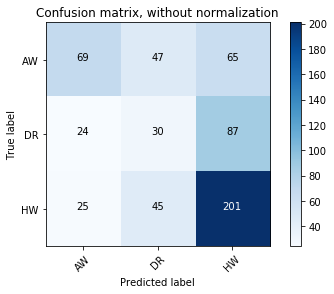

In [159]:
clf = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 43, max_features = 'auto', random_state = 6632) 
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['AW', 'DR', 'HW'], title='Confusion matrix, without normalization')

In [193]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 43, max_features = 'auto', random_state = 6632)
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_train = preprocessing.scale(features_train)
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_test = preprocessing.scale(features_test)
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [500]
        draw_odd = [500]
        lose_odd = [500]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    for i in range(len(data_test)):
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
        all_res.append(sum(result))
        invested.append(500*len(result))
        ROI.append(sum(result)/(500*len(result)))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()  

For season 2008/2009 Invested: 174000 Profit 750.0 ROI 0.00431034482759
For season 2009/2010 Invested: 186500 Profit -6625.0 ROI -0.0355227882038
For season 2010/2011 Invested: 183500 Profit -21745.0 ROI -0.118501362398
For season 2011/2012 Invested: 183500 Profit -18055.0 ROI -0.0983923705722
For season 2012/2013 Invested: 190000 Profit -13905.0 ROI -0.0731842105263
For season 2013/2014 Invested: 189000 Profit 20050.0 ROI 0.106084656085
For season 2014/2015 Invested: 185500 Profit 3780.0 ROI 0.0203773584906
For season 2015/2016 Invested: 188500 Profit -5105.0 ROI -0.0270822281167
SUMMARY Invested: 1480500 Profit: -40855.0 ROI: -0.0275954069571


In [203]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']

def best_income_fun(min_leaf, max_depth):
    min_leaf_best = 0
    depth_best = 0
    win_odd = [0, 500]
    draw_odd = [0, 500]
    lose_odd = [0, 500]
    best_odd = []
    Total_invested = 0
    Total_profit = 0
    last_best = -20
    for win in win_odd:
        for lose in lose_odd:
            for draw in draw_odd:
                for j in min_leaf:
                    for x in max_depth:
                        clf = DecisionTreeClassifier(max_depth = x, min_samples_leaf = j, max_features = 'auto', random_state = 6632)
                        all_res = []
                        all_invest = []
                        total = 0
                        profit = 0
                        invested = 0
                        ROI = 0 
                        for s in seasons:
                            data_train = data_1[data_1['season'] != s]
                            features_train = data_train[['Last_3_games_at_home',
                           'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            features_train = preprocessing.scale(features_train)
                            target_train = data_train[['Class']].values
                            data_test = data_1[data_1['season'] == s]
                            features_test = data_test[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            features_test = preprocessing.scale(features_test)
                            target_test = data_test[['Class']].values
                            c, r = target_train.shape
                            target_train = target_train.reshape(c,)
                            c, r = target_test.shape
                            target_test = target_test.reshape(c,)
                            clf.fit(features_train, target_train)
                            Class = data_test['Class'].values
                            Book_H = data_test['B365H'].values
                            Book_D = data_test['B365D'].values
                            Book_A = data_test['B365A'].values
                            pred = clf.predict(features_test)
                            best_res = -10000
                            result = []
                            invest = []
                            for i in range(len(data_test)):
                                if Class[i] == pred[i]:
                                    if Class[i] == 1:
                                        result.append((Book_H[i] - 1) * win)
                                        invest.append(win)
                                    if Class[i] == 0:
                                        result.append((Book_D[i] - 1) * draw)
                                        invest.append(draw)
                                    if Class[i] == -1:
                                        result.append((Book_A[i] - 1) * lose)
                                        invest.append(lose)
                                else:
                                    if pred[i] == 1:
                                        result.append((-1) * win)
                                        invest.append(win)
                                    if pred[i] == 0:
                                        result.append((-1) * draw)
                                        invest.append(draw)
                                    if pred[i] == -1:
                                        result.append((-1) * lose)
                                        invest.append(lose)
                            all_res.append(sum(result))
                            all_invest.append(sum(invest))
                        profit = np.sum(all_res)
                        invested = np.sum(all_invest)
                        ROI = profit/invested
                        if ROI > last_best:
                            last_best = ROI
                            min_leaf_best = j
                            depth_best = x
                            Total_invested = invested
                            Total_profit = profit
                            best_odd = [win, draw, lose]
    print('min_leaf_best:', min_leaf_best, 'max_depth_best:',  depth_best,'Profit', Total_profit,'Invested:', Total_invested,'odds_vestor', best_odd, 'ROI', last_best)
best_income_fun(np.arange(10, 100, 5), np.arange(3, 10, 1))    

min_leaf_best: 55 max_depth_best: 4 Profit 13050.0 Invested: 91500 odds_vestor [0, 500, 0] ROI 0.14262295082


In [205]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 55, max_features = 'auto', random_state = 6632)
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_train = preprocessing.scale(features_train)
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_test = preprocessing.scale(features_test)
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [0]
        draw_odd = [500]
        lose_odd = [0]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    invest = []
                    for i in range(len(data_test)):
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                                invest.append(win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                                invest.append(draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                                invest.append(lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                                invest.append(win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                                invest.append(draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
                                invest.append(lose)
        all_res.append(sum(result))
        invested.append(sum(invest))
        ROI.append(sum(result)/sum(invest))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()  

For season 2008/2009 Invested: 4000 Profit 4200.0 ROI 1.05
For season 2009/2010 Invested: 1500 Profit 300.0 ROI 0.2
For season 2010/2011 Invested: 0 Profit 0.0 ROI nan
For season 2011/2012 Invested: 20000 Profit -8525.0 ROI -0.42625
For season 2012/2013 Invested: 31000 Profit 7650.0 ROI 0.246774193548
For season 2013/2014 Invested: 4500 Profit -1000.0 ROI -0.222222222222
For season 2014/2015 Invested: 3000 Profit 2875.0 ROI 0.958333333333
For season 2015/2016 Invested: 27500 Profit 7550.0 ROI 0.274545454545
SUMMARY Invested: 91500 Profit: 13050.0 ROI: 0.14262295082


In [216]:
def best_income_fun_with_prob(min_samples_leaf, draw_array):
    leaf_best = 0
    last_profit = 0
    last_invest = 0
    ROI = -20
    profit = 0
    invested = 0
    win_odd = [0, 500]
    draw_odd = [0, 500]
    lose_odd = [0, 500]
    odds_array = []
    win_odd_best = -1
    draw_odd_best = -1
    lose_odd_best = -1
    number_of_odds = 0
    last_best = -10000
    total = 0
    best_max_feat = -1
    best_thres = 0
    n = 0 
    for dr_pr in draw_array:
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:                       
                    for j in min_samples_leaf:
                        clf = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = j, max_features = 'auto', random_state = 6632)
                        all_res = []
                        all_invest = []
                        n = 0
                        for s in seasons:
                            data_train = data_1[data_1['season'] != s]
                            features_train = data_train[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            target_train = data_train[['Class']].values
                            data_test = data_1[data_1['season'] == s]
                            features_test = data_test[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            target_test = data_test[['Class']].values
                            c, r = target_train.shape
                            target_train = target_train.reshape(c,)
                            c, r = target_test.shape
                            target_test = target_test.reshape(c,)
                            clf.fit(features_train, target_train)
                            Class = data_test['Class'].values
                            Book_H = data_test['B365H'].values
                            Book_D = data_test['B365D'].values
                            Book_A = data_test['B365A'].values
                            pred = clf.predict(features_test)
                            probs = clf.predict_proba(features_test)
                            win_pr = probs[:, 2]
                            draw_pr = probs[:, 1]
                            lose_pr = probs[:, 0]
                            result = []
                            invest = []
                            for i in range(len(data_test)):
                                if draw_pr[i] > dr_pr or pred[i] == 0:
                                    pred[i] = 0
                                    n = n + 1
                                if Class[i] == pred[i]:
                                    if Class[i] == 1:
                                        result.append((Book_H[i] - 1) * win)
                                        invest.append(win)
                                    if Class[i] == 0:
                                        result.append((Book_D[i] - 1) * draw)
                                        invest.append(draw)
                                    if Class[i] == -1:
                                        result.append((Book_A[i] - 1) * lose)
                                        invest.append(lose)
                                else:
                                    if pred[i] == 1:
                                        result.append((-1) * win)
                                        invest.append(win)
                                    if pred[i] == 0:
                                        result.append((-1) * draw)
                                        invest.append(draw)
                                    if pred[i] == -1:
                                        result.append((-1) * lose)
                                        invest.append(lose)
                            all_res.append(sum(result))
                            all_invest.append(sum(invest))
                        profit = np.sum(all_res)
                        invested = np.sum(all_invest)
                        ROI = profit/invested
                        if profit > last_profit:
                            last_best = ROI
                            leaf_best = j
                            last_profit = profit
                            last_invest = invested
                            odds_array = [win, draw, lose]
                            best_thres = dr_pr
                            number_of_odds = n
    print('Total Invested:', last_invest, 'Best_thres:', best_thres, 'min_samples_leaf', leaf_best, 'Total_profit', last_profit, 'ROI', last_best, 'odd vector:', odds_array)
best_income_fun_with_prob(np.arange(50, 100, 5), np.arange(0.27, 0.36, 0.01))    

Total Invested: 551500 Best_thres: 0.28 min_samples_leaf 80 Total_profit 45405.0 ROI 0.0823300090662 odd vector: [0, 500, 0]


In [217]:
def best_income_fun_with_prob(min_samples_leaf, draw_array):
    leaf_best = 0
    last_profit = 0
    last_invest = 0
    ROI = -20
    profit = 0
    invested = 0
    win_odd = [0, 500]
    draw_odd = [0, 500]
    lose_odd = [0, 500]
    odds_array = []
    win_odd_best = -1
    draw_odd_best = -1
    lose_odd_best = -1
    number_of_odds = 0
    last_best = -10000
    total = 0
    best_max_feat = -1
    best_thres = 0
    n = 0 
    for dr_pr in draw_array:
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:                       
                    for j in min_samples_leaf:
                        clf = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = j, max_features = 'auto', random_state = 6632)
                        all_res = []
                        all_invest = []
                        n = 0
                        for s in seasons:
                            data_train = data_1[data_1['season'] != s]
                            features_train = data_train[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            target_train = data_train[['Class']].values
                            data_test = data_1[data_1['season'] == s]
                            features_test = data_test[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            target_test = data_test[['Class']].values
                            c, r = target_train.shape
                            target_train = target_train.reshape(c,)
                            c, r = target_test.shape
                            target_test = target_test.reshape(c,)
                            clf.fit(features_train, target_train)
                            Class = data_test['Class'].values
                            Book_H = data_test['B365H'].values
                            Book_D = data_test['B365D'].values
                            Book_A = data_test['B365A'].values
                            pred = clf.predict(features_test)
                            probs = clf.predict_proba(features_test)
                            win_pr = probs[:, 2]
                            draw_pr = probs[:, 1]
                            lose_pr = probs[:, 0]
                            result = []
                            invest = []
                            for i in range(len(data_test)):
                                if draw_pr[i] > dr_pr or pred[i] == 0:
                                    pred[i] = 0
                                    n = n + 1
                                if Class[i] == pred[i]:
                                    if Class[i] == 1:
                                        result.append((Book_H[i] - 1) * win)
                                        invest.append(win)
                                    if Class[i] == 0:
                                        result.append((Book_D[i] - 1) * draw)
                                        invest.append(draw)
                                    if Class[i] == -1:
                                        result.append((Book_A[i] - 1) * lose)
                                        invest.append(lose)
                                else:
                                    if pred[i] == 1:
                                        result.append((-1) * win)
                                        invest.append(win)
                                    if pred[i] == 0:
                                        result.append((-1) * draw)
                                        invest.append(draw)
                                    if pred[i] == -1:
                                        result.append((-1) * lose)
                                        invest.append(lose)
                            all_res.append(sum(result))
                            all_invest.append(sum(invest))
                        profit = np.sum(all_res)
                        invested = np.sum(all_invest)
                        ROI = profit/invested
                        if ROI > last_best:
                            last_best = ROI
                            leaf_best = j
                            last_profit = profit
                            last_invest = invested
                            odds_array = [win, draw, lose]
                            best_thres = dr_pr
                            number_of_odds = n
    print('Total Invested:', last_invest, 'Best_thres:', best_thres, 'min_samples_leaf', leaf_best, 'Total_profit', last_profit, 'ROI', last_best, 'odd vector:', odds_array)
best_income_fun_with_prob(np.arange(50, 100, 5), np.arange(0.27, 0.36, 0.01))    

Total Invested: 319500 Best_thres: 0.33 min_samples_leaf 70 Total_profit 38440.0 ROI 0.120312989045 odd vector: [0, 500, 0]


# AdaBoost

In [ ]:
Подбор параметров для Accuracy

In [94]:
from sklearn.ensemble import AdaBoostClassifier
def best_params_AdaBoost(n_est):
    best_acc = 0
    best_est = 0
    for j in n_est:
        clf = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = j, random_state = 6632)
        scores = cross_val_score(clf, features, target, cv=5)
        if np.mean(scores) > best_acc:
            best_acc = np.mean(scores)
            best_est = j
    print('BEST RESULT = ''best_est', best_est, 'accuracy = ', best_acc)
best_params_AdaBoost(np.arange(40, 70, 1))

BEST RESULT = best_est 56 accuracy =  0.508622032448


Confusion matrix:

0.517706576728
Confusion matrix, without normalization
[[ 77  34  70]
 [ 39  25  77]
 [ 32  34 205]]


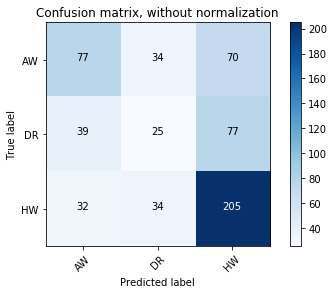

In [165]:
features = preprocessing.scale(features)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=6632)
clf = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = 56)
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['AW', 'DR', 'HW'], title='Confusion matrix, without normalization')

In [197]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = 56)
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_train = preprocessing.scale(features_train)
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_test = preprocessing.scale(features_test)
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [500]
        draw_odd = [500]
        lose_odd = [500]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    for i in range(len(data_test)):
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
        all_res.append(sum(result))
        invested.append(500*len(result))
        ROI.append(sum(result)/(500*len(result)))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()  

For season 2008/2009 Invested: 174000 Profit -6980.0 ROI -0.0401149425287
For season 2009/2010 Invested: 186500 Profit -9910.0 ROI -0.0531367292225
For season 2010/2011 Invested: 183500 Profit -8860.0 ROI -0.0482833787466
For season 2011/2012 Invested: 183500 Profit -2415.0 ROI -0.0131607629428
For season 2012/2013 Invested: 190000 Profit 485.0 ROI 0.00255263157895
For season 2013/2014 Invested: 189000 Profit 12560.0 ROI 0.066455026455
For season 2014/2015 Invested: 185500 Profit 415.0 ROI 0.0022371967655
For season 2015/2016 Invested: 188500 Profit -23985.0 ROI -0.12724137931
SUMMARY Invested: 1480500 Profit: -38690.0 ROI: -0.0261330631543


In [209]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']

def best_income_fun(n_est):
    n_est_best = 0
    win_odd = [0, 500]
    draw_odd = [0, 500]
    lose_odd = [0, 500]
    best_odd = []
    Total_invested = 0
    Total_profit = 0
    last_best = -20
    for win in win_odd:
        for lose in lose_odd:
            for draw in draw_odd:
                for x in n_est:
                    clf = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = x)
                    all_res = []
                    all_invest = []
                    total = 0
                    profit = 0
                    invested = 0
                    ROI = 0 
                    for s in seasons:
                        data_train = data_1[data_1['season'] != s]
                        features_train = data_train[['Last_3_games_at_home',
                       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                        features_train = preprocessing.scale(features_train)
                        target_train = data_train[['Class']].values
                        data_test = data_1[data_1['season'] == s]
                        features_test = data_test[['Last_3_games_at_home',
                        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                        features_test = preprocessing.scale(features_test)
                        target_test = data_test[['Class']].values
                        c, r = target_train.shape
                        target_train = target_train.reshape(c,)
                        c, r = target_test.shape
                        target_test = target_test.reshape(c,)
                        clf.fit(features_train, target_train)
                        Class = data_test['Class'].values
                        Book_H = data_test['B365H'].values
                        Book_D = data_test['B365D'].values
                        Book_A = data_test['B365A'].values
                        pred = clf.predict(features_test)
                        best_res = -10000
                        result = []
                        invest = []
                        for i in range(len(data_test)):
                            if Class[i] == pred[i]:
                                if Class[i] == 1:
                                    result.append((Book_H[i] - 1) * win)
                                    invest.append(win)
                                if Class[i] == 0:
                                    result.append((Book_D[i] - 1) * draw)
                                    invest.append(draw)
                                if Class[i] == -1:
                                    result.append((Book_A[i] - 1) * lose)
                                    invest.append(lose)
                            else:
                                if pred[i] == 1:
                                    result.append((-1) * win)
                                    invest.append(win)
                                if pred[i] == 0:
                                    result.append((-1) * draw)
                                    invest.append(draw)
                                if pred[i] == -1:
                                    result.append((-1) * lose)
                                    invest.append(lose)
                        all_res.append(sum(result))
                        all_invest.append(sum(invest))
                    profit = np.sum(all_res)
                    invested = np.sum(all_invest)
                    ROI = profit/invested
                    if ROI > last_best:
                        last_best = ROI
                        n_est_best = x
                        Total_invested = invested
                        Total_profit = profit
                        best_odd = [win, draw, lose]
    print('n_est_best:', n_est_best, 'Profit', Total_profit,'Invested:', Total_invested,'odds_vestor', best_odd, 'ROI', last_best)
best_income_fun(np.arange(10, 100, 5))    

n_est_best: 40 Profit 20725.0 Invested: 76000 odds_vestor [0, 500, 0] ROI 0.272697368421


In [210]:
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
def income_fun():
    clf = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = 40)
    all_res = []
    invested = []
    ROI = []
    total = 0
    for s in seasons:
        data_train = data_1[data_1['season'] != s]
        features_train = data_train[['Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_train = preprocessing.scale(features_train)
        target_train = data_train[['Class']].values
        data_test = data_1[data_1['season'] == s]
        features_test = data_test[['Last_3_games_at_home',
        'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
        'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
        features_test = preprocessing.scale(features_test)
        target_test = data_test[['Class']].values
        c, r = target_train.shape
        target_train = target_train.reshape(c,)
        c, r = target_test.shape
        target_test = target_test.reshape(c,)
        clf.fit(features_train, target_train)
        win_odd = [0]
        draw_odd = [500]
        lose_odd = [0]
        Class = data_test['Class'].values
        Book_H = data_test['B365H'].values
        Book_D = data_test['B365D'].values
        Book_A = data_test['B365A'].values
        pred = clf.predict(features_test)
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:
                    result = []
                    invest = []
                    for i in range(len(data_test)):
                        if Class[i] == pred[i]:
                            if Class[i] == 1:
                                result.append((Book_H[i] - 1) * win)
                                invest.append(win)
                            if Class[i] == 0:
                                result.append((Book_D[i] - 1) * draw)
                                invest.append(draw)
                            if Class[i] == -1:
                                result.append((Book_A[i] - 1) * lose)
                                invest.append(lose)
                        else:
                            if pred[i] == 1:
                                result.append((-1) * win)
                                invest.append(win)
                            if pred[i] == 0:
                                result.append((-1) * draw)
                                invest.append(draw)
                            if pred[i] == -1:
                                result.append((-1) * lose)
                                invest.append(lose)
        all_res.append(sum(result))
        invested.append(sum(invest))
        ROI.append(sum(result)/sum(invest))
    for s in range(len(seasons)):
        print('For season', seasons[s], 'Invested:', invested[s], 'Profit', all_res[s], 'ROI', ROI[s])
    print('SUMMARY', 'Invested:', sum(invested), 'Profit:', sum(all_res), 'ROI:', sum(all_res)/sum(invested))
income_fun()  

For season 2008/2009 Invested: 12000 Profit 4350.0 ROI 0.3625
For season 2009/2010 Invested: 14500 Profit 650.0 ROI 0.0448275862069
For season 2010/2011 Invested: 9500 Profit 2525.0 ROI 0.265789473684
For season 2011/2012 Invested: 9000 Profit -725.0 ROI -0.0805555555556
For season 2012/2013 Invested: 13500 Profit 6975.0 ROI 0.516666666667
For season 2013/2014 Invested: 4000 Profit 2800.0 ROI 0.7
For season 2014/2015 Invested: 6000 Profit 2725.0 ROI 0.454166666667
For season 2015/2016 Invested: 7500 Profit 1425.0 ROI 0.19
SUMMARY Invested: 76000 Profit: 20725.0 ROI: 0.272697368421


In [218]:
def best_income_fun_with_prob(n_est, draw_array):
    leaf_best = 0
    last_profit = 0
    last_invest = 0
    ROI = -20
    profit = 0
    invested = 0
    win_odd = [0, 500]
    draw_odd = [0, 500]
    lose_odd = [0, 500]
    odds_array = []
    win_odd_best = -1
    draw_odd_best = -1
    lose_odd_best = -1
    number_of_odds = 0
    last_best = -10000
    total = 0
    best_max_feat = -1
    best_thres = 0
    n = 0 
    for dr_pr in draw_array:
        for win in win_odd:
            for lose in lose_odd:
                for draw in draw_odd:                       
                    for j in n_est:
                        clf = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = j)
                        all_res = []
                        all_invest = []
                        n = 0
                        for s in seasons:
                            data_train = data_1[data_1['season'] != s]
                            features_train = data_train[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            features_train = preprocessing.scale(features_train)
                            target_train = data_train[['Class']].values
                            data_test = data_1[data_1['season'] == s]
                            features_test = data_test[['Last_3_games_at_home',
                            'Last_3_games_away', 'CL_H', 'CL_A', 'Defense_h', 'Mid_h', 'Attack_h',
                            'Defense_a', 'Mid_a', 'Attack_a','B365H', 'B365D', 'B365A']].values
                            features_test = preprocessing.scale(features_test)
                            target_test = data_test[['Class']].values
                            c, r = target_train.shape
                            target_train = target_train.reshape(c,)
                            c, r = target_test.shape
                            target_test = target_test.reshape(c,)
                            clf.fit(features_train, target_train)
                            Class = data_test['Class'].values
                            Book_H = data_test['B365H'].values
                            Book_D = data_test['B365D'].values
                            Book_A = data_test['B365A'].values
                            pred = clf.predict(features_test)
                            probs = clf.predict_proba(features_test)
                            win_pr = probs[:, 2]
                            draw_pr = probs[:, 1]
                            lose_pr = probs[:, 0]
                            result = []
                            invest = []
                            for i in range(len(data_test)):
                                if draw_pr[i] > dr_pr or pred[i] == 0:
                                    pred[i] = 0
                                    n = n + 1
                                if Class[i] == pred[i]:
                                    if Class[i] == 1:
                                        result.append((Book_H[i] - 1) * win)
                                        invest.append(win)
                                    if Class[i] == 0:
                                        result.append((Book_D[i] - 1) * draw)
                                        invest.append(draw)
                                    if Class[i] == -1:
                                        result.append((Book_A[i] - 1) * lose)
                                        invest.append(lose)
                                else:
                                    if pred[i] == 1:
                                        result.append((-1) * win)
                                        invest.append(win)
                                    if pred[i] == 0:
                                        result.append((-1) * draw)
                                        invest.append(draw)
                                    if pred[i] == -1:
                                        result.append((-1) * lose)
                                        invest.append(lose)
                            all_res.append(sum(result))
                            all_invest.append(sum(invest))
                        profit = np.sum(all_res)
                        invested = np.sum(all_invest)
                        ROI = profit/invested
                        if profit > last_profit:
                            last_best = ROI
                            leaf_best = j
                            last_profit = profit
                            last_invest = invested
                            odds_array = [win, draw, lose]
                            best_thres = dr_pr
                            number_of_odds = n
    print('Total Invested:', last_invest, 'Best_thres:', best_thres, 'min_samples_leaf', leaf_best, 'Total_profit', last_profit, 'ROI', last_best, 'odd vector:', odds_array)
best_income_fun_with_prob(np.arange(50, 100, 5), np.arange(0.27, 0.36, 0.01))    

Total Invested: 128000 Best_thres: 0.35 min_samples_leaf 60 Total_profit 17775.0 ROI 0.1388671875 odd vector: [0, 500, 0]


# Прочие графики

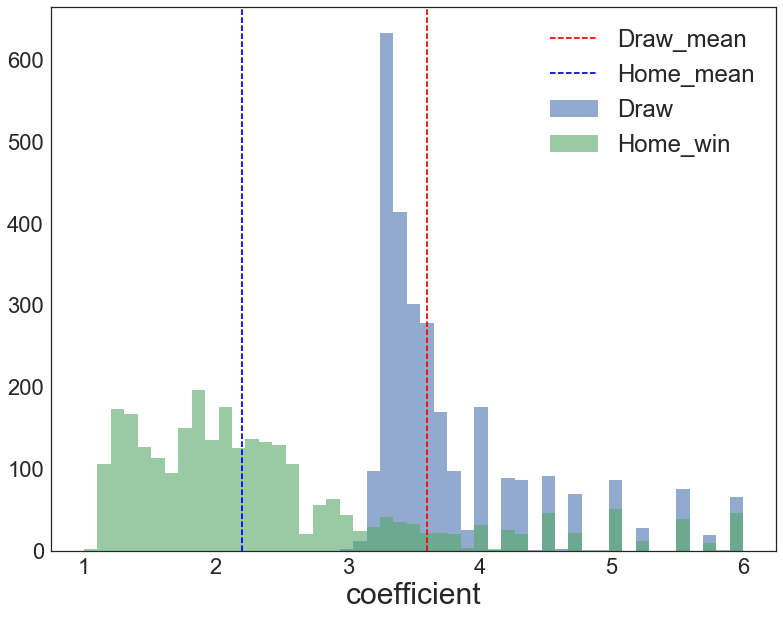

In [195]:
bins = np.linspace(1, 6, 50)
f,ax=plt.subplots(figsize=(13,10))
plt.xlabel('coefficient', size = 30)
plt.hist(data_1['B365D'], bins, alpha=0.6)
ax.axvline(np.median(data_1['B365D']), color='r', linestyle='--',label='mean')
plt.hist(data_1['B365H'], bins, alpha=0.6)
ax.axvline(np.median(data_1['B365H']), color='b', linestyle='--',label='mean') 
plt.legend(['Draw_mean', 'Home_mean', 'Draw', 'Home_win'], prop={'size':24})
plt.tick_params(axis='both', which='major', labelsize=22)
plt.savefig('lol.png')

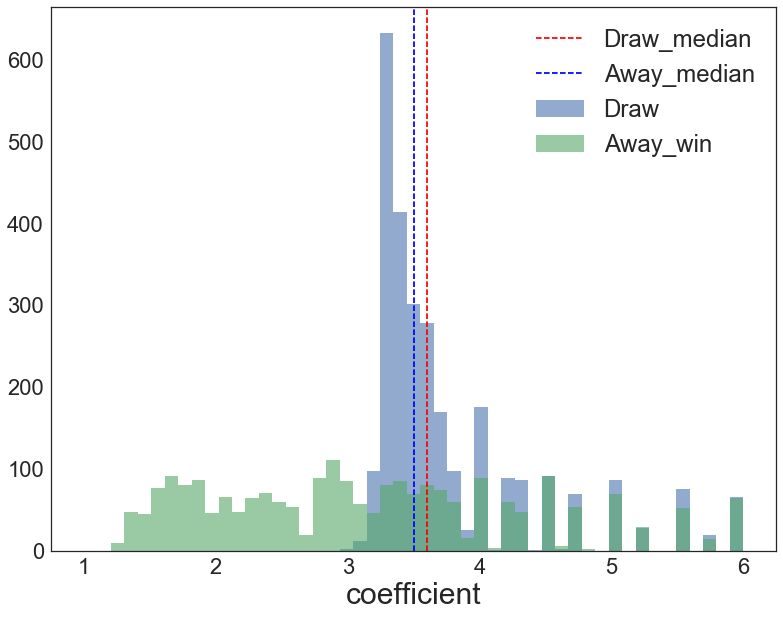

In [198]:
bins = np.linspace(1, 6, 50)
f,ax=plt.subplots(figsize=(13,10))
plt.xlabel('coefficient', size = 30)
plt.hist(data_1['B365D'], bins, alpha=0.6)
ax.axvline(np.median(data_1['B365D']), color='r', linestyle='--',label='mean')
plt.hist(data_1['B365A'], bins, alpha=0.6)
ax.axvline(np.median(data_1['B365A']), color='b', linestyle='--',label='mean') 
plt.legend(['Draw_median', 'Away_median', 'Draw', 'Away_win'], prop={'size':24})
plt.tick_params(axis='both', which='major', labelsize=22)
plt.savefig('lol.png')

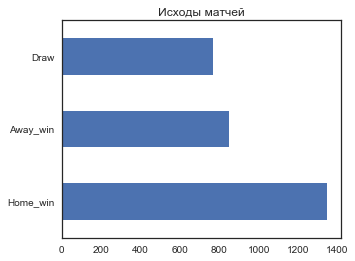

In [149]:
width = 5
height = 4
plt.figure(figsize=(width, height))
data_1['Class_name'] = data_1['Class'].map({-1: 'Away_win', 0: 'Draw', 1:'Home_win'})
data_1['Class_name'].value_counts().plot(kind='barh')
plt.title('Исходы матчей')
plt.savefig('foo.png')

In [118]:
data_2 = data_1[['Last_H_5_games_points_total',
       'Last_A_5_games_points_total', 'Last_3_games_at_home',
       'Last_3_games_away', 'CL_H', 'CL_A', 'EL_H', 'EL_A', 'GK_h', 'Defense_h', 'Mid_h', 'Attack_h', 'GK_a',
       'Defense_a', 'Mid_a', 'Attack_a', 'B365H', 'B365D', 'B365A', 'Class']]

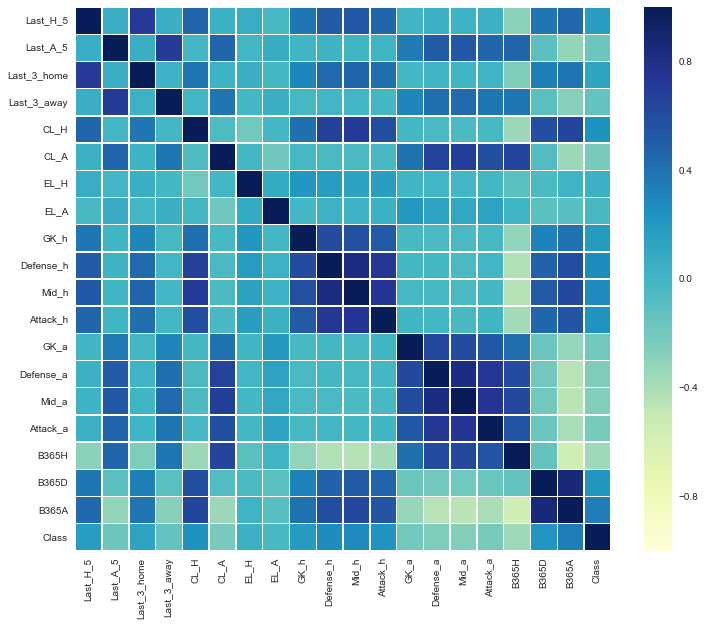

In [141]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))
corr = data_2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, cmap="YlGnBu")

In [127]:
data_2.columns = ['Last_H_5',
       'Last_A_5', 'Last_3_home',
       'Last_3_away', 'CL_H', 'CL_A', 'EL_H', 'EL_A', 'GK_h', 'Defense_h', 'Mid_h', 'Attack_h', 'GK_a',
       'Defense_a', 'Mid_a', 'Attack_a', 'B365H', 'B365D', 'B365A', 'Class']

In [70]:
data_book = pd.read_excel('/Users/admin/Desktop/Football_db/APL_last_data2.xlsx', sheetname = 'Book')

Confusion matrix, without normalization
[[ 427    0  420]
 [ 230    0  536]
 [ 207    0 1141]]


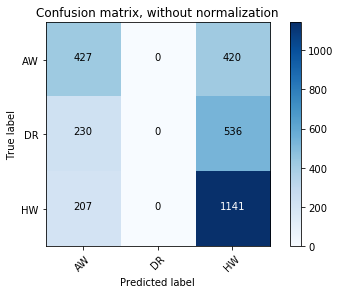

In [89]:
target123 = data_book['Class'].values
target1234 = data_book['Book_class'].values
cnf_matrix = confusion_matrix(target123, target1234)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['AW', 'DR', 'HW'], title='Confusion matrix, without normalization')

0.512647554806
Confusion matrix, without normalization
[[ 82   0  88]
 [ 60   0 101]
 [ 40   0 222]]


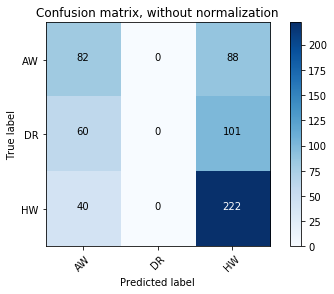

In [221]:
cnf_matrix = confusion_matrix(y_test, X_test)
np.set_printoptions(precision=2)
print(accuracy_score(y_test,X_test))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['AW', 'DR', 'HW'], title='Confusion matrix, without normalization')

In [220]:
X_train, X_test, y_train, y_test = train_test_split(
    target1234, target123, test_size=0.2, random_state = 666)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(target123, target1234)

0.52955082742316784

# Summaries

1 task. Best accuracy

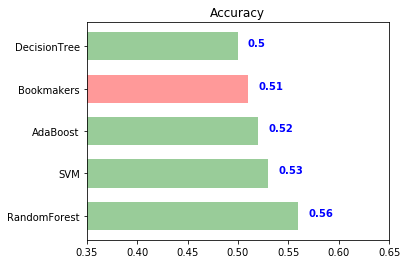

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
names = ['RandomForest', 'SVM', 'AdaBoost', 'Bookmakers', 'DecisionTree']
accuracy = [0.56, 0.53, 0.52, 0.51, 0.50]
ax = plt.subplot()
plt.gcf().subplots_adjust(left=0.2)
ax.barh(range(len(names)), accuracy, 1/1.5, alpha = 0.4, color = ['g', 'g', 'g', 'r', 'g'])
ax.set_xlim([0.35, 0.65])
plt.yticks(range(len(names)), names)
plt.title('Accuracy')
for i, v in enumerate(accuracy):
    ax.text(v + 0.01, i , str(v), color='blue', fontweight='bold')
plt.savefig('foo.png')

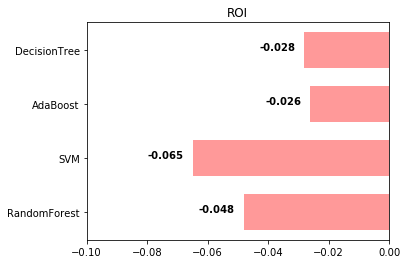

In [95]:
names = ['RandomForest', 'SVM', 'AdaBoost','DecisionTree']
accuracy = [-0.048, -0.065, -0.026, -0.028]
ax = plt.subplot()
plt.gcf().subplots_adjust(left=0.2)
ax.barh(range(len(names)), accuracy, 1/1.5, alpha = 0.4, color = 'r')
ax.set_xlim([-0.1, 0])
plt.yticks(range(len(names)), names)
plt.title('ROI')
for i, v in enumerate(accuracy):
    ax.text(v - 0.015, i , str(v), color='black', fontweight='bold')
plt.savefig('foo.png')

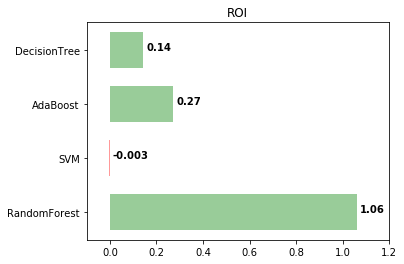

In [96]:
names = ['RandomForest', 'SVM', 'AdaBoost','DecisionTree']
accuracy = [1.06, -0.003, 0.27, 0.14]
ax = plt.subplot()
plt.gcf().subplots_adjust(left=0.2)
ax.barh(range(len(names)), accuracy, 1/1.5, alpha = 0.4, color = ['g', 'r','g','g'])
ax.set_xlim([-0.1, 1.2])
plt.yticks(range(len(names)), names)
plt.title('ROI')
for i, v in enumerate(accuracy):
    ax.text(v + 0.015, i , str(v), color='black', fontweight='bold')
plt.savefig('foo.png')

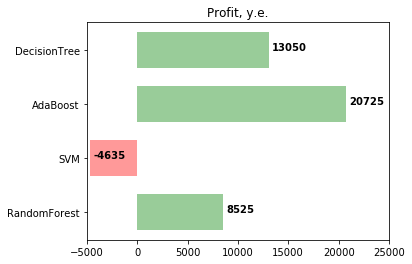

In [90]:
names = ['RandomForest', 'SVM', 'AdaBoost','DecisionTree']
accuracy = [8525, -4635, 20725, 13050]
ax = plt.subplot()
plt.gcf().subplots_adjust(left=0.2)
ax.barh(range(len(names)), accuracy, 1/1.5, alpha = 0.4, color = ['g', 'r','g','g'])
ax.set_xlim([-5000, 25000])
plt.yticks(range(len(names)), names)
plt.title('Profit, у.е.')
for i, v in enumerate(accuracy):
    ax.text(v + 300, i , str(v), color='black', fontweight='bold')
plt.savefig('foo.png')

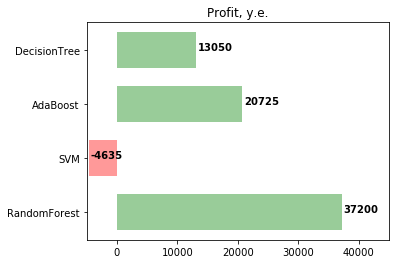

In [94]:
names = ['RandomForest', 'SVM', 'AdaBoost','DecisionTree']
accuracy = [37200, -4635, 20725, 13050]
ax = plt.subplot()
plt.gcf().subplots_adjust(left=0.2)
ax.barh(range(len(names)), accuracy, 1/1.5, alpha = 0.4, color = ['g', 'r','g','g'])
ax.set_xlim([-5000, 45000])
plt.yticks(range(len(names)), names)
plt.title('Profit, у.е.')
for i, v in enumerate(accuracy):
    ax.text(v + 300, i , str(v), color='black', fontweight='bold')
plt.savefig('foo.png')